<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Linea_de_espera_dos_servidores_serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAS DE ESPERA CON UN SERVIDOR

Los fenómenos de espera, tiene los siguientes elementos en común:
* Llegada al mostrador
* Paso por uno o varios mostradores
* Duración en los que se recibe la atencion con su propio modelo de probabilidad conocido

Existen diferentes escenarios:

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

In [2]:
def servicio(t):
  if 0 <=t<=3:
    return 5+5*t
  elif 3<t<=5:
    return 20
  elif 5<t<=9:
    return 20-2*(t-5)
  else:
    return 0

In [4]:
def llegada(t):
  Lambda = 0.34
  T = 60

  llegadas = []
  tiempos = []

  while t <= T:
      U1 = rnd.random()
      t = t - np.log(U1) / Lambda
      U2 = rnd.random()

      if U2 <= servicio(t) / Lambda:
          TS = t
          llegadas.append(TS)
          tiempos.append(TS)
  return np.mean(tiempos)

## COLA DE DOS SERVIDORES EN SERIE

*Variables:*
* $\;\;\;t\;\;\;$ :     Tiempo
* $N_{LL}$ : Número de llegadas hasat el instante $t$
* $N_S\;\;$ : Número de salidas hasta el intante $t$
* $\;\;n_1\;\;$ : Número de clientes en la cola y atendido, en $S_1$ para el instante $t$
* $\;\;n_2\;\;$ : Número de clientes $S_2$ en el instante $t$

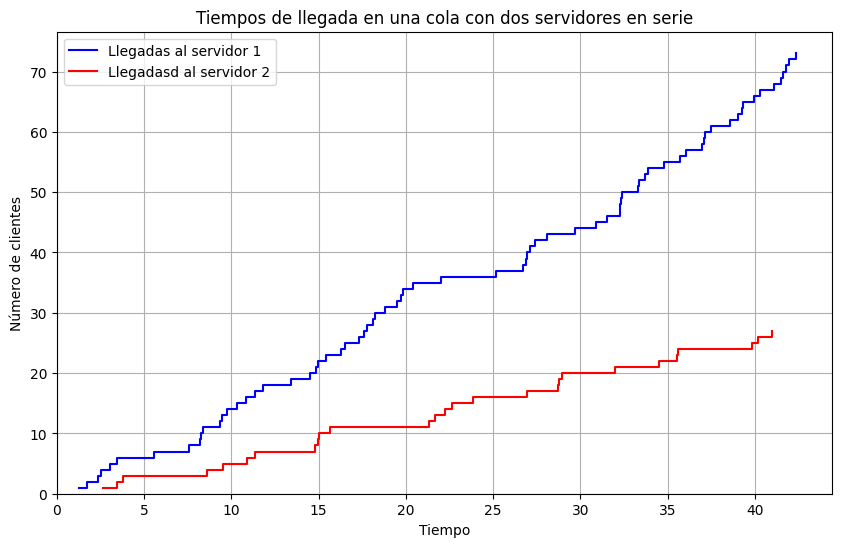

In [17]:
# Inicialización
t = 0
N_events = 100  # Número de eventos a simular
n1 = 0
n2 = 0
N_LL = 0
N_S = 0
t_LL = 0
t1 = float('inf')
t2 = float('inf')
LAMBDA_1 = 0.34
LAMBDA_2 = 0.34

# Función para generar tiempos de llegada y servicio
def generar_tiempo_llegada():
    return random.expovariate(1.0)  # Tasa de llegada

def generar_tiempo_servicio():
    return random.expovariate(1.0)  # Tasa de servicio

# Generar el primer tiempo de llegada
T0 = -np.log(random.random()) / LAMBDA_1
t_LL = T0

# Listas para almacenar los tiempos de llegada y servicio
LL1 = []
S = []

# Simulación
for _ in range(N_events):
    if t_LL <= t1 and t_LL <= t2:
        # CASO 1
        t = t_LL
        N_LL += 1
        n1 += 1
        LL1.append(t)
        T_t = generar_tiempo_servicio()
        t_LL = t + T_t

        if n1 == 1:
            Y = generar_tiempo_servicio()
            t1 = t + Y

    elif t_LL > t1 and t1 <= t2:
        # CASO 2
        t = t1
        n1 -= 1
        n2 += 1
        LL1.append(t)

        if n1 == 0:
            t1 = float('inf')
        else:
            Y1 = generar_tiempo_servicio()
            t1 += Y1

        if n2 == 1:
            Y2 = generar_tiempo_servicio()
            t2 = t + Y2

    elif t2 < t1 and t2 < t_LL:
        # CASO 3
        t = t2
        N_S += 1
        n2 -= 1
        S.append(t)

        if n2 > 0:
            Y2 = generar_tiempo_servicio()
            t2 = t + Y2
        else:
            t2 = float('inf')

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de tiempos de llegada al servidor 1
plt.step(LL1, range(1, len(LL1) + 1), where='post', label='Llegadas al servidor 1', color='blue')

# Gráfica de tiempos de llegada al servidor 2
plt.step(S, range(1, len(S) + 1), where='post', label='Llegadasd al servidor 2', color='red')

# Gráfica
plt.title('Tiempos de llegada en una cola con dos servidores en serie')
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes')
plt.legend()
plt.grid()
plt.xlim(left=0)  # Limitar el eje x para que comience desde 0
plt.ylim(bottom=0)  # Limitar el eje y para que comience desde 0
plt.show()